#WINE QUALITY PREDICTION








**IMPORT NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

**Data Preprocessing**

In [2]:
df_rw = pd.read_csv('winequality-red.csv')
df_ww = pd.read_csv('wineQualityWhites.csv')



In [3]:
df_rw.shape

(1599, 12)

In [4]:
df_rw.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df_ww = pd.read_csv('wineQualityWhites.csv')
df_ww.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df_ww.shape

(4898, 13)

In [7]:
df_ww.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [8]:
df_ww = df_ww.drop('Unnamed: 0',axis =1)
df_ww.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
df_ww = df_ww.rename(columns = {"fixed.acidity":"fixed acidity","volatile.acidity":"volatile acidity","citric.acid":"citric acid",
                                 "residual.sugar":"residual sugar","free.sulfur.dioxide":"free sulfur dioxide",
                                 "total.sulfur.dioxide":"total sulfur dioxide"})

In [10]:
df_ww.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
df_rw['Type'] = 'red' 
df_ww['Type'] = 'white'

In [12]:
df_rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [13]:
final_df = pd.concat([df_rw,df_ww])

In [14]:
final_df.shape

(6497, 13)

In [15]:
final_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [16]:
final_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [17]:
Type={'red':1,'white':0}

In [18]:
final_df['Type']= [Type[item] for item in final_df['Type']] 

In [19]:
final_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [20]:
final_df.shape

(6497, 13)

In [21]:
final_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Type'],
      dtype='object')

In [22]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [23]:
final_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


No null values 

##Visualization of Dataset


**Distribution of DataSet into Red and Wine**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Type of wine')

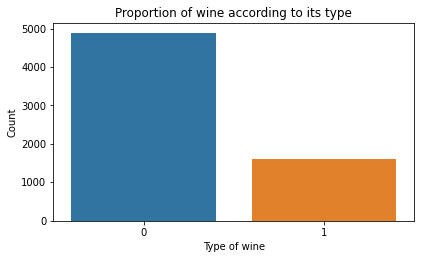

In [24]:
fig = plt.figure(figsize=(22,8)) 
plt.subplot2grid((2,3),(0,0))
sns.countplot(final_df['Type'])
plt.title("Proportion of wine according to its type"); plt.ylabel("Count"); plt.xlabel("Type of wine")

**Here 0 = Red , 1 = White**

**Distribution of Quality Data**

In [25]:
final_df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

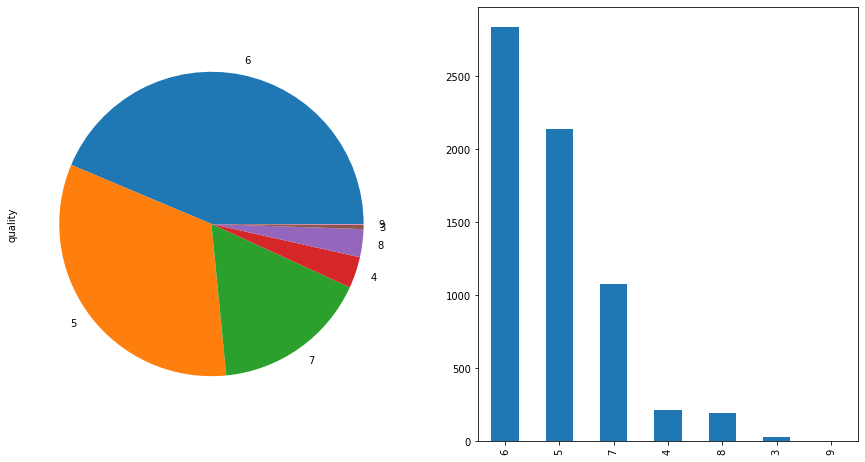

In [26]:
f,ax = plt.subplots(1,2,figsize=(15,8))
pd.Series(final_df['quality'].value_counts()).plot(kind='pie',ax=ax[0])
final_df['quality'].value_counts().plot.bar(ax=ax[1])

**Removing Outliers Using Inter Quartile Range for better Performance**

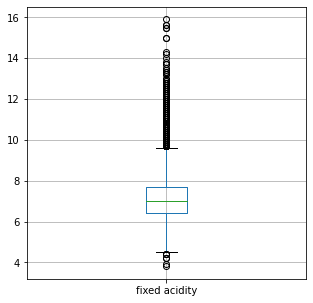

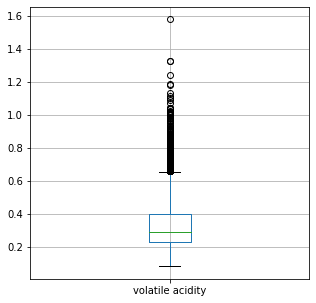

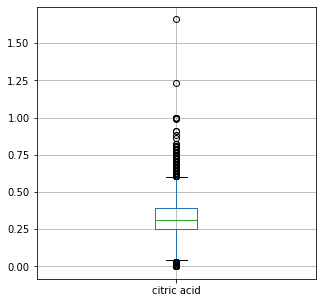

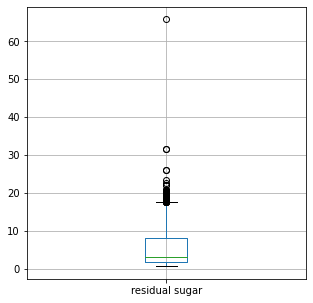

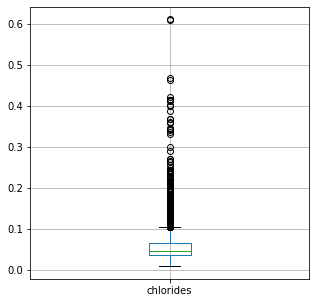

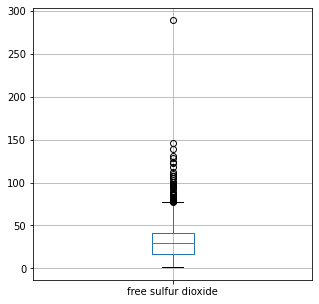

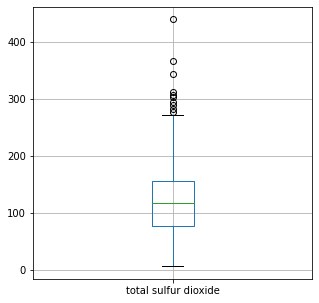

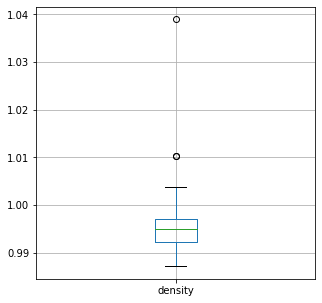

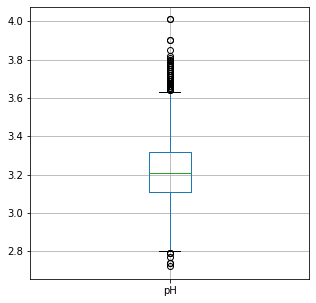

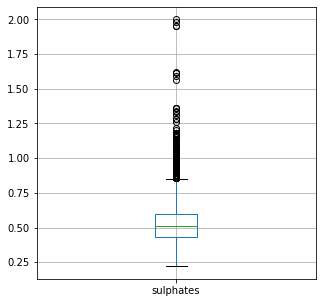

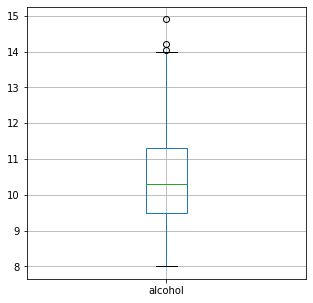

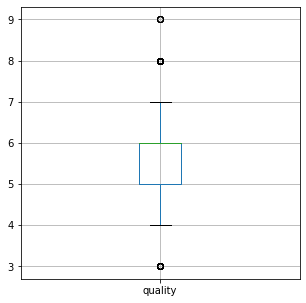

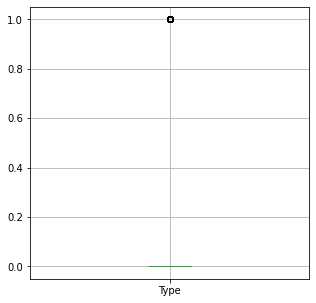

In [27]:
for column in final_df:
    plt.figure(figsize=(5,5))
    final_df.boxplot([column],grid = True)

In [28]:
q1 = final_df.quantile(0.25)
q3 = final_df.quantile(0.75)
iqr = q3-q1
l = q1-1.5*iqr
h = q3+1.5*iqr
final_data = final_df[((final_df >= (q1 - 1.5 * iqr))& (final_df <= (q3 + 1.5 * iqr))).all(axis=1)]
final_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
count,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.0
mean,6.851696,0.272113,0.323184,6.069180,0.043088,34.253968,136.889370,0.993849,3.189577,0.486558,10.552524,5.848244,0.0
std,0.801561,0.089565,0.093105,4.634705,0.011456,15.087977,41.429235,0.002778,0.142849,0.105916,1.192063,0.770711,0.0
min,4.700000,0.080000,0.040000,0.600000,0.009000,2.000000,10.000000,0.987110,2.800000,0.220000,8.400000,4.000000,0.0
25%,6.300000,0.210000,0.270000,1.700000,0.035000,23.000000,107.000000,0.991680,3.090000,0.410000,9.500000,5.000000,0.0
50%,6.800000,0.260000,0.310000,5.000000,0.043000,33.000000,133.000000,0.993620,3.180000,0.470000,10.400000,6.000000,0.0
75%,7.300000,0.320000,0.370000,9.200000,0.050000,45.000000,166.000000,0.995810,3.280000,0.550000,11.400000,6.000000,0.0
max,9.600000,0.655000,0.600000,17.500000,0.105000,77.000000,272.000000,1.001820,3.630000,0.850000,14.000000,7.000000,0.0


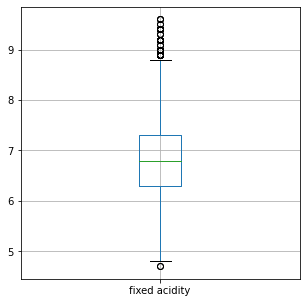

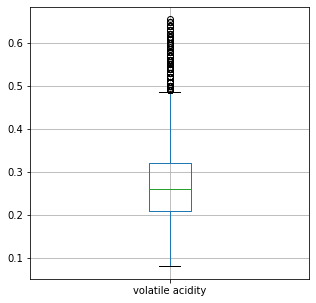

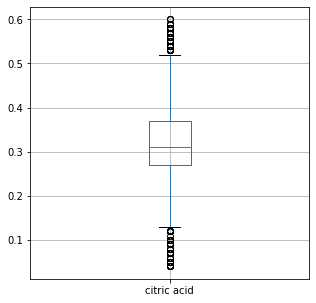

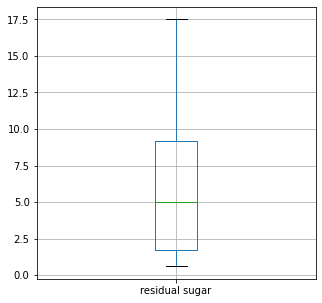

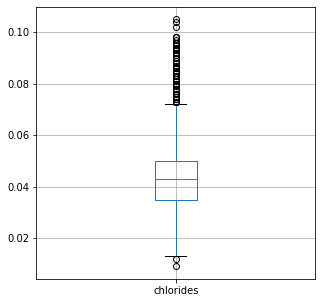

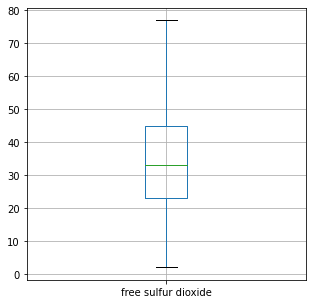

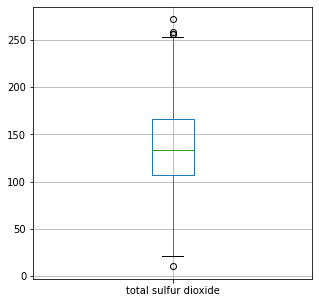

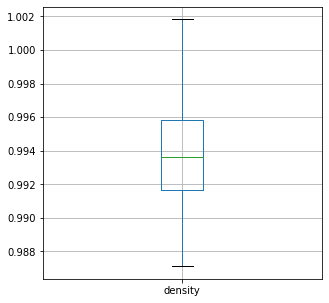

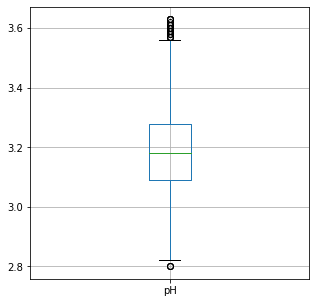

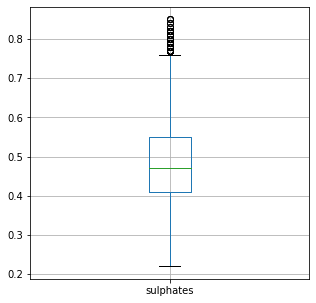

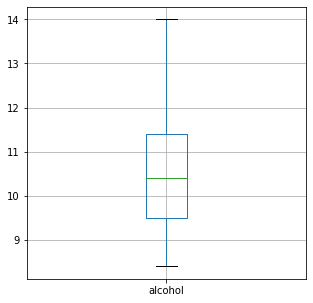

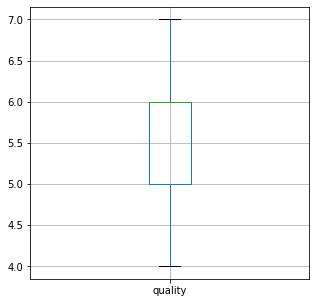

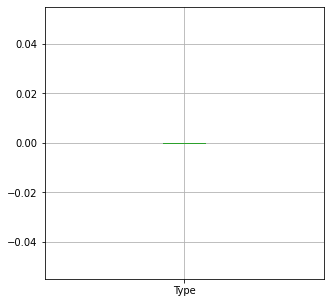

In [29]:
for i in final_data.columns:
    plt.figure(figsize = (5,5))
    final_data.boxplot(column=i)
    plt.show()

**Correlation Matrix of Dataset**

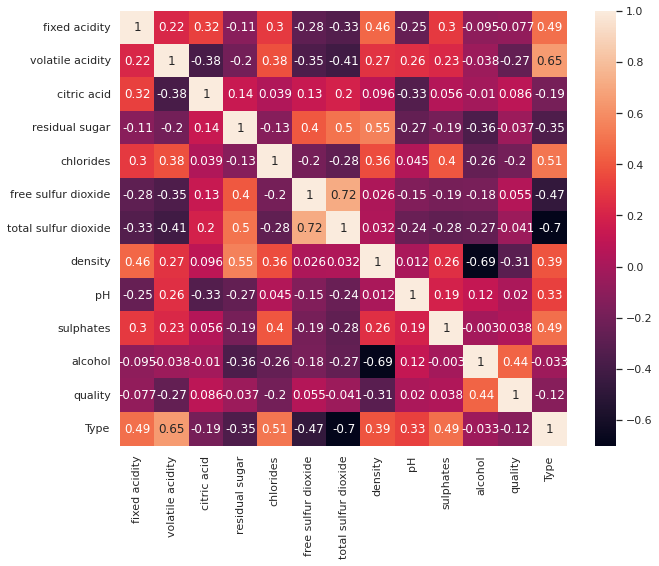

In [30]:
sns.set(rc={'figure.figsize':(10,8)})
Correlation = sns.heatmap(final_df.corr(), annot=True)

**Here,Values greater than 0 have positive correlation,
Values less than 0 have negative correlation,
Values equal to 0 have no correlation**


**Bar plots,Scatter Plot and Histogram to see relation between each independent feature with dependent feature 'Quality'**

In [31]:
final_data.shape

(4158, 13)

<function matplotlib.pyplot.show>

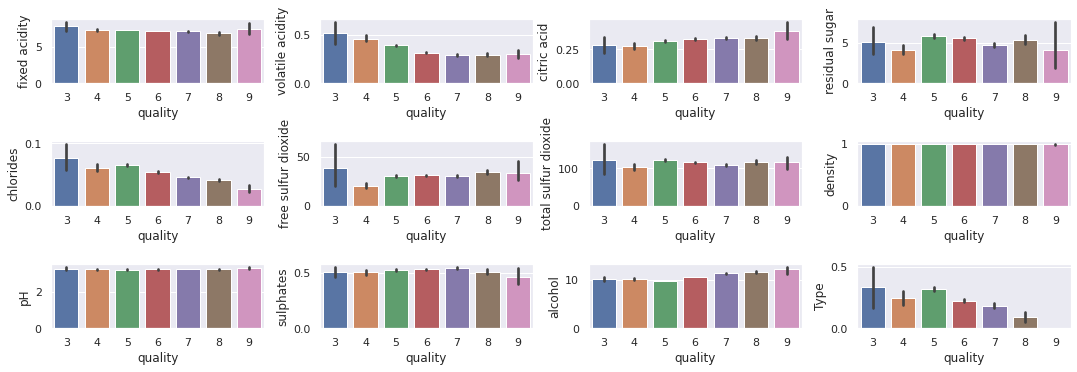

In [32]:
##Barplot

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15, 5))
ax = ax.flatten()
index=0
for i in final_df.columns:
  if i != 'quality':
    sns.barplot(x='quality', y=i, data=final_df, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show

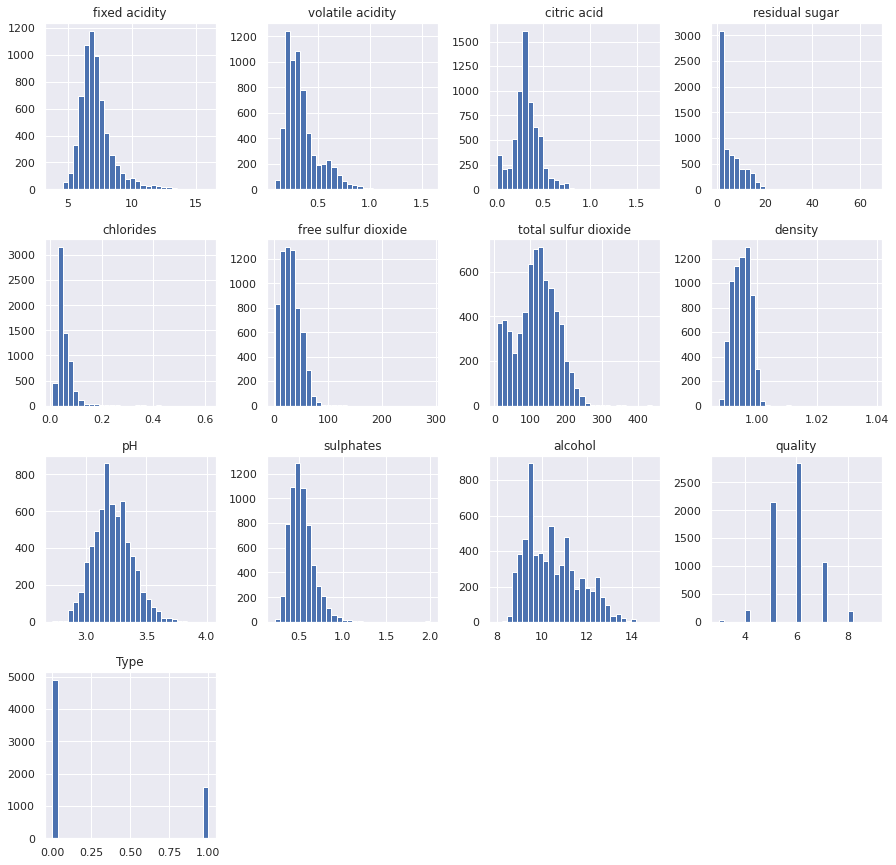

In [33]:
##Histogram

final_df.hist(figsize=(15,15),bins=30)
plt.show()

## Machine Learning on Dataset using both Original Dataset and Principal Component analysis


In [34]:
y = final_data['quality']
X = final_data.drop('quality',axis = 1)

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True)

In [36]:
X_train.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type
373,7.2,0.270,0.27,2.4,0.048,30.0,149.0,0.99360,3.10,0.51,9.20,0
4544,5.8,0.280,0.30,3.9,0.026,36.0,105.0,0.98963,3.26,0.58,12.75,0
1310,5.2,0.365,0.08,13.5,0.041,37.0,142.0,0.99700,3.46,0.39,9.90,0
4214,7.0,0.440,0.24,12.1,0.056,68.0,210.0,0.99718,3.05,0.50,9.50,0
2666,5.9,0.340,0.31,2.0,0.030,38.0,142.0,0.98892,3.40,0.41,12.90,0


In [37]:
X_train.shape

(2910, 12)

In [38]:
X_test.shape

(1248, 12)

In [39]:
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [40]:
X_train_pca[0]

array([-11.29615434,   7.02180383,  -3.73837038,  -1.55135128,
         0.24754606])

In [41]:
X_test_pca[0]

array([13.84036276, 13.23931481, -1.86895552,  1.1894588 , -0.44405966])

In [42]:
X_train_pca.shape

(2910, 5)

In [43]:
X_test_pca.shape

(1248, 5)

**K-Nearest Neighbour**

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [45]:
##Using Original Dataset

neighbour = [1,3,5,10,20]
for i in neighbour:
    clf = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    clf.fit(X_train,y_train)
    prediction = clf.predict(X_test)
    accuracy = accuracy_score(y_test,prediction)
    print('Accuracy for K nearest neighbour = ',i,'is',accuracy)


Accuracy for K nearest neighbour =  1 is 0.5713141025641025
Accuracy for K nearest neighbour =  3 is 0.5024038461538461
Accuracy for K nearest neighbour =  5 is 0.48878205128205127
Accuracy for K nearest neighbour =  10 is 0.49038461538461536
Accuracy for K nearest neighbour =  20 is 0.484775641025641


In [46]:
##Using Principal Component Analysis

neighbour = [1,3,5,10,20]
for i in neighbour:
    clf = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    clf.fit(X_train_pca,y_train)
    prediction = clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test,prediction)
    print('Accuracy for K nearest neighbour = ',i,'is',accuracy)

Accuracy for K nearest neighbour =  1 is 0.5697115384615384
Accuracy for K nearest neighbour =  3 is 0.5016025641025641
Accuracy for K nearest neighbour =  5 is 0.49038461538461536
Accuracy for K nearest neighbour =  10 is 0.48878205128205127
Accuracy for K nearest neighbour =  20 is 0.483974358974359


**Here Best model is Principal Component Analysis with Kneighbours = 1**

In [47]:
clf = KNeighborsClassifier(n_neighbors=1, weights='uniform')
clf.fit(X_train_pca,y_train)
prediction = clf.predict(X_test_pca)
confusion_matrix(y_test,prediction)


array([[  7,  15,   9,   7],
       [  6, 196, 120,  40],
       [ 16, 122, 386,  94],
       [  1,  30,  77, 122]])

In [48]:
print(classification_report(y_test,prediction))


              precision    recall  f1-score   support

           4       0.23      0.18      0.21        38
           5       0.54      0.54      0.54       362
           6       0.65      0.62      0.64       618
           7       0.46      0.53      0.49       230

    accuracy                           0.57      1248
   macro avg       0.47      0.47      0.47      1248
weighted avg       0.57      0.57      0.57      1248



**Decision Tree**

In [49]:
from sklearn.tree import DecisionTreeClassifier


In [50]:
##Using Original Dataset

depth = [25,50,100,500,None]
for i in depth:
    clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=i)
    clf.fit(X_train,y_train)
    prediction = clf.predict(X_test)
    accuracy = accuracy_score(y_test,prediction)
    print('Accuracy for max depth = ',i,'is',accuracy)


Accuracy for max depth =  25 is 0.6065705128205128
Accuracy for max depth =  50 is 0.6009615384615384
Accuracy for max depth =  100 is 0.5961538461538461
Accuracy for max depth =  500 is 0.6009615384615384
Accuracy for max depth =  None is 0.594551282051282


In [51]:
##Using Principal Component Analysis

depth = [25,50,100,500,None]
for i in depth:
    clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=i)
    clf.fit(X_train_pca,y_train)
    prediction = clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test,prediction)
    print('Accuracy for max depth = ',i,'is',accuracy)

Accuracy for max depth =  25 is 0.5729166666666666
Accuracy for max depth =  50 is 0.5729166666666666
Accuracy for max depth =  100 is 0.5809294871794872
Accuracy for max depth =  500 is 0.5753205128205128
Accuracy for max depth =  None is 0.5745192307692307


**Here,Best accuracy can be achieved by using PCA with Max_depth = 100**

In [52]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=100)
clf.fit(X_train_pca,y_train)
prediction = clf.predict(X_test_pca)
confusion_matrix(y_test,prediction)


array([[ 10,  10,  16,   2],
       [ 19, 207, 106,  30],
       [ 16, 135, 366, 101],
       [  0,  25,  78, 127]])

In [53]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           4       0.22      0.26      0.24        38
           5       0.55      0.57      0.56       362
           6       0.65      0.59      0.62       618
           7       0.49      0.55      0.52       230

    accuracy                           0.57      1248
   macro avg       0.48      0.49      0.48      1248
weighted avg       0.58      0.57      0.57      1248



**Support Vector Machine**

In [54]:
from sklearn import svm

In [55]:
##Using Original Dataset

clf = svm.SVC()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
accuracy_svm = accuracy_score(y_test,prediction)
print(accuracy_svm)

0.4951923076923077


In [56]:
#Using Principal Component Analysis

clf = svm.SVC()
clf.fit(X_train_pca,y_train)
prediction = clf.predict(X_test_pca)
accuracy_svmpca = accuracy_score(y_test,prediction)
print(accuracy_svmpca)

0.49919871794871795


In [57]:
confusion_matrix(y_test,prediction)

array([[  0,  11,  27,   0],
       [  0,  92, 270,   0],
       [  0,  87, 531,   0],
       [  0,  12, 218,   0]])

In [58]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        38
           5       0.46      0.25      0.33       362
           6       0.51      0.86      0.64       618
           7       0.00      0.00      0.00       230

    accuracy                           0.50      1248
   macro avg       0.24      0.28      0.24      1248
weighted avg       0.38      0.50      0.41      1248



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Naive Bayes**


In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
##Using Original Dataset

GNB = GaussianNB()
GNB.fit(X_train,y_train)
prediction = GNB.predict(X_test)
accuracy_nb = accuracy_score(y_test,prediction)
print(accuracy_nb)

0.4567307692307692


In [61]:
##Using Principal Component Analysis

GNB = GaussianNB()
GNB.fit(X_train_pca,y_train)
prediction = GNB.predict(X_test_pca)
accuracy_nbpca = accuracy_score(y_test,prediction)
print(accuracy_nbpca)

0.5072115384615384


In [62]:
confusion_matrix(y_test,prediction)

array([[  3,  16,  19,   0],
       [ 11, 140, 205,   6],
       [  5, 126, 430,  57],
       [  0,  31, 139,  60]])

In [63]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           4       0.16      0.08      0.11        38
           5       0.45      0.39      0.41       362
           6       0.54      0.70      0.61       618
           7       0.49      0.26      0.34       230

    accuracy                           0.51      1248
   macro avg       0.41      0.36      0.37      1248
weighted avg       0.49      0.51      0.49      1248



**Random Forest Classifier**

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
accuracy_rf = accuracy_score(y_test,prediction)
print(accuracy_rf)


0.6802884615384616


In [66]:
clf = RandomForestClassifier()
clf.fit(X_train_pca,y_train)
prediction = clf.predict(X_test_pca)
accuracy_rfpca = accuracy_score(y_test,prediction)
print(accuracy_rfpca)

0.6330128205128205


In [67]:
confusion_matrix(y_test,prediction)

array([[  7,  18,  12,   1],
       [  3, 213, 133,  13],
       [  2, 114, 448,  54],
       [  0,  13,  95, 122]])

In [68]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           4       0.58      0.18      0.28        38
           5       0.59      0.59      0.59       362
           6       0.65      0.72      0.69       618
           7       0.64      0.53      0.58       230

    accuracy                           0.63      1248
   macro avg       0.62      0.51      0.53      1248
weighted avg       0.63      0.63      0.63      1248



In [69]:
Model_keys = ['Knn','DT','SVM','NB','RF']
Accuracy_values = [0.592,0.621,0.481,0.501,0.697]

Text(0.5, 1.0, 'Accuracy Score Comparision using bar plot')

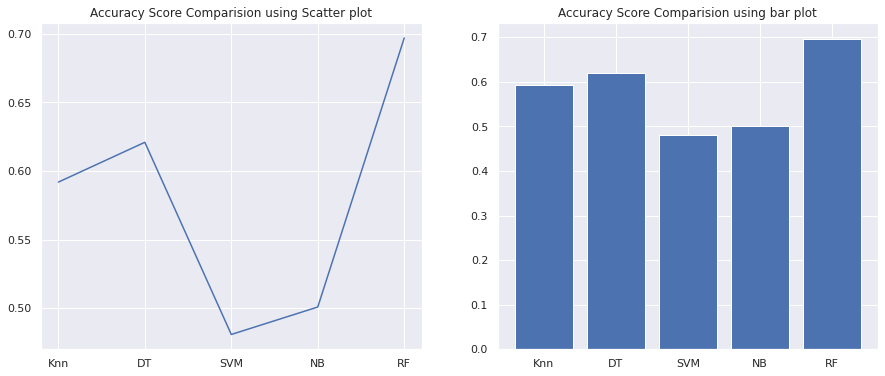

In [70]:
f,ax=plt.subplots(1,2,figsize=(15,6))
ax[0].plot(Model_keys,Accuracy_values)
ax[0].set_title('Accuracy Score Comparision using Scatter plot')
ax[1].bar(Model_keys,Accuracy_values)
ax[1].set_title('Accuracy Score Comparision using bar plot')
